In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

In [8]:
columns = [
    'Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
    'Savings', 'Employment', 'InstallmentRate', 'PersonalStatus', 'OtherDebtors',
    'ResidenceDuration', 'Property', 'Age', 'OtherInstallments', 'Housing',
    'ExistingCredits', 'Job', 'NumberDependents', 'Telephone', 'ForeignWorker', 'Target'
]

## Data preparation and data cleaning.

In [46]:
df = pd.read_csv(url, sep=' ', header=None, names=columns)

In [47]:
df.head()

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,Employment,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherInstallments,Housing,ExistingCredits,Job,NumberDependents,Telephone,ForeignWorker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [48]:
df.shape

(1000, 21)

In [49]:
df.columns

Index(['Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
       'Savings', 'Employment', 'InstallmentRate', 'PersonalStatus',
       'OtherDebtors', 'ResidenceDuration', 'Property', 'Age',
       'OtherInstallments', 'Housing', 'ExistingCredits', 'Job',
       'NumberDependents', 'Telephone', 'ForeignWorker', 'Target'],
      dtype='object')

In [50]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.strip().str.replace(' ', '_')

In [51]:
df.columns = (df.columns
              .str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True)
              .str.lower()
              .str.replace(' ', '_')
              .str.strip())

In [52]:
df.head()

,status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installments,housing,existing_credits,job,number_dependents,telephone,foreign_worker,target
0,a11,6,a34,a43,1169,a65,a75,4,a93,a101,...,a121,67,a143,a152,2,a173,1,a192,a201,1
1,a12,48,a32,a43,5951,a61,a73,2,a92,a101,...,a121,22,a143,a152,1,a173,1,a191,a201,2
2,a14,12,a34,a46,2096,a61,a74,2,a93,a101,...,a121,49,a143,a152,1,a172,2,a191,a201,1
3,a11,42,a32,a42,7882,a61,a74,2,a93,a103,...,a122,45,a143,a153,1,a173,2,a191,a201,1
4,a11,24,a33,a40,4870,a61,a73,3,a93,a101,...,a124,53,a143,a153,2,a173,2,a191,a201,2


In [53]:
df.shape

(1000, 21)

## EDA.

Transform the income target column.

In [55]:
df.target.value_counts()

target
1    700
2    300
Name: count, dtype: int64

In [56]:
df['target'] = df['target'].apply(lambda x: 0 if x == 1 else 1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   status              1000 non-null   object
 1   duration            1000 non-null   int64 
 2   credit_history      1000 non-null   object
 3   purpose             1000 non-null   object
 4   credit_amount       1000 non-null   int64 
 5   savings             1000 non-null   object
 6   employment          1000 non-null   object
 7   installment_rate    1000 non-null   int64 
 8   personal_status     1000 non-null   object
 9   other_debtors       1000 non-null   object
 10  residence_duration  1000 non-null   int64 
 11  property            1000 non-null   object
 12  age                 1000 non-null   int64 
 13  other_installments  1000 non-null   object
 14  housing             1000 non-null   object
 15  existing_credits    1000 non-null   int64 
 16  job                 1000 

There are 20 features to consider for income prediction.

The numerical features include duration, credit_amount, installment_rate, residence_duration, age, existing_credits and number_dependents.

The categorical features status, credit_history, purpose, savings, employment, personal_status, other_debtors, property, other_installments, housing, job, telephone and foreign_worker.

There is no missing values in the dataset.

In [58]:
df.target.value_counts(normalize=True)

target
0    0.7
1    0.3
Name: proportion, dtype: float64

In [60]:
df.target.mean()

np.float64(0.3)

In [61]:
numerical = ['duration', 'credit_amount', 'installment_rate', 'residence_duration', 'age',
             'existing_credits', 'number_dependents']

In [62]:
categorical = ['status', 'credit_history', 'purpose', 'savings',
               'employment', 'personal_status', 'property', 'other_installments',
               'housing', 'job', 'foreign_worker']

In [63]:
df[categorical].nunique()

status                 4
credit_history         5
purpose               10
savings                5
employment             5
personal_status        4
property               4
other_installments     3
housing                3
job                    4
foreign_worker         2
dtype: int64

## Feature importance. Credit Score Rate and Credit Score Ratio.

The target 0 is good credit risk, 1 is bad credit risk.

In [64]:
df.head()

,status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installments,housing,existing_credits,job,number_dependents,telephone,foreign_worker,target
0,a11,6,a34,a43,1169,a65,a75,4,a93,a101,...,a121,67,a143,a152,2,a173,1,a192,a201,0
1,a12,48,a32,a43,5951,a61,a73,2,a92,a101,...,a121,22,a143,a152,1,a173,1,a191,a201,1
2,a14,12,a34,a46,2096,a61,a74,2,a93,a101,...,a121,49,a143,a152,1,a172,2,a191,a201,0
3,a11,42,a32,a42,7882,a61,a74,2,a93,a103,...,a122,45,a143,a153,1,a173,2,a191,a201,0
4,a11,24,a33,a40,4870,a61,a73,3,a93,a101,...,a124,53,a143,a153,2,a173,2,a191,a201,1


In [67]:
df.personal_status.value_counts()

personal_status
a93    548
a92    310
a94     92
a91     50
Name: count, dtype: int64

In [68]:
target_female = df[df.personal_status == 'a92'].target.mean()
target_female

np.float64(0.35161290322580646)

In [69]:
target_male_single = df[df.personal_status == 'a93'].target.mean()
target_male_single

np.float64(0.2664233576642336)

In [70]:
target_male_married_widowed = df[df.personal_status == 'a94'].target.mean()
target_male_married_widowed

np.float64(0.2717391304347826)

In [72]:
global_good_credit = 1 - df.target.mean()
global_good_credit

np.float64(0.7)

In [73]:
global_good_credit - target_female

np.float64(0.3483870967741935)

In [74]:
global_good_credit - target_male_single

np.float64(0.43357664233576637)

In [75]:
global_good_credit - target_male_married_widowed

np.float64(0.42826086956521736)

In [78]:
for c in categorical:
    print(c)
    df_group = df.groupby(c).target.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_good_credit
    df_group['risk'] = df_group['mean'] / global_good_credit
    display(df_group)
    print()
    print()

status


,mean,count,diff,risk
status,,,,
a11,0.492701,274,-0.207299,0.703858
a12,0.390335,269,-0.309665,0.557621
a13,0.222222,63,-0.477778,0.317460
a14,0.116751,394,-0.583249,0.166788




credit_history


,mean,count,diff,risk
credit_history,,,,
a30,0.625000,40,-0.075000,0.892857
a31,0.571429,49,-0.128571,0.816327
a32,0.318868,530,-0.381132,0.455526
a33,0.318182,88,-0.381818,0.454545
a34,0.170648,293,-0.529352,0.243784




purpose


,mean,count,diff,risk
purpose,,,,
a40,0.380342,234,-0.319658,0.543346
a41,0.165049,103,-0.534951,0.235784
a410,0.416667,12,-0.283333,0.595238
a42,0.320442,181,-0.379558,0.457774
a43,0.221429,280,-0.478571,0.316327
a44,0.333333,12,-0.366667,0.476190
a45,0.363636,22,-0.336364,0.519481
a46,0.440000,50,-0.260000,0.628571
a48,0.111111,9,-0.588889,0.158730




savings


,mean,count,diff,risk
savings,,,,
a61,0.359867,603,-0.340133,0.514096
a62,0.330097,103,-0.369903,0.471567
a63,0.174603,63,-0.525397,0.249433
a64,0.125000,48,-0.575000,0.178571
a65,0.174863,183,-0.525137,0.249805




employment


,mean,count,diff,risk
employment,,,,
a71,0.370968,62,-0.329032,0.529954
a72,0.406977,172,-0.293023,0.581395
a73,0.306785,339,-0.393215,0.438264
a74,0.224138,174,-0.475862,0.320197
a75,0.252964,253,-0.447036,0.361378




personal_status


,mean,count,diff,risk
personal_status,,,,
a91,0.400000,50,-0.300000,0.571429
a92,0.351613,310,-0.348387,0.502304
a93,0.266423,548,-0.433577,0.380605
a94,0.271739,92,-0.428261,0.388199




property


,mean,count,diff,risk
property,,,,
a121,0.212766,282,-0.487234,0.303951
a122,0.306034,232,-0.393966,0.437192
a123,0.307229,332,-0.392771,0.438898
a124,0.435065,154,-0.264935,0.621521




other_installments


,mean,count,diff,risk
other_installments,,,,
a141,0.410072,139,-0.289928,0.585817
a142,0.404255,47,-0.295745,0.577508
a143,0.275184,814,-0.424816,0.393120




housing


,mean,count,diff,risk
housing,,,,
a151,0.391061,179,-0.308939,0.558659
a152,0.260870,713,-0.439130,0.372671
a153,0.407407,108,-0.292593,0.582011




job


,mean,count,diff,risk
job,,,,
a171,0.318182,22,-0.381818,0.454545
a172,0.280000,200,-0.420000,0.400000
a173,0.295238,630,-0.404762,0.421769
a174,0.344595,148,-0.355405,0.492278




foreign_worker


,mean,count,diff,risk
foreign_worker,,,,
a201,0.307373,963,-0.392627,0.439104
a202,0.108108,37,-0.591892,0.154440


In [82]:
from sklearn.metrics import mutual_info_score

In [85]:
def mutual_info_target_score(series):
    return mutual_info_score(series, df.target)

In [86]:
mi = df[categorical].apply(mutual_info_target_score)
mi.sort_values(ascending=False)

status                0.065668
credit_history        0.030234
savings               0.019488
purpose               0.017255
property              0.011773
employment            0.009082
housing               0.008840
other_installments    0.006152
personal_status       0.004721
foreign_worker        0.004036
job                   0.000927
dtype: float64

In [94]:
df[numerical].corrwith(df.target).abs()

duration              0.214927
credit_amount         0.154739
installment_rate      0.072404
residence_duration    0.002967
age                   0.091127
existing_credits      0.045732
number_dependents     0.003015
dtype: float64

In [173]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.20, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.20, random_state=1)

In [89]:
df_train.shape, df_val.shape, df_test.shape

((640, 21), (160, 21), (200, 21))

In [174]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [175]:
y_train = df_train.target.astype('int').values
y_val = df_val.target.astype('int').values
y_test = df_test.target.astype('int').values

In [176]:
del df_train['target']
del df_val['target']
del df_test['target']

In [148]:
from sklearn.feature_extraction import DictVectorizer

In [177]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.fillna(0).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [178]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [179]:
test_dicts = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [102]:
import pickle

In [180]:
with open('dv.pkl', 'wb') as f_dv:
    pickle.dump(dv, f_dv)

## Model Selection Process.

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np

In [183]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

In [184]:
results = {}
scoring_metrics = {
    'accuracy': accuracy_score,
    'f1': f1_score,
    'roc_auc': roc_auc_score
}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    scores = {}
    scores['accuracy'] = accuracy_score(y_val, y_pred)
    scores['f1'] = f1_score(y_val, y_pred)
    scores['roc_auc'] = roc_auc_score(y_val, y_proba) if y_proba is not None else None
    results[name] = scores

results_df = pd.DataFrame(results).T

/home/user/Downloads/credit_score_api/.conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [02:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [185]:
results_df

,accuracy,f1,roc_auc
Decision Tree,0.68750,0.479167,0.65000
Random Forest,0.84375,0.647887,0.83375
XGBoost,0.75625,0.480000,0.83250


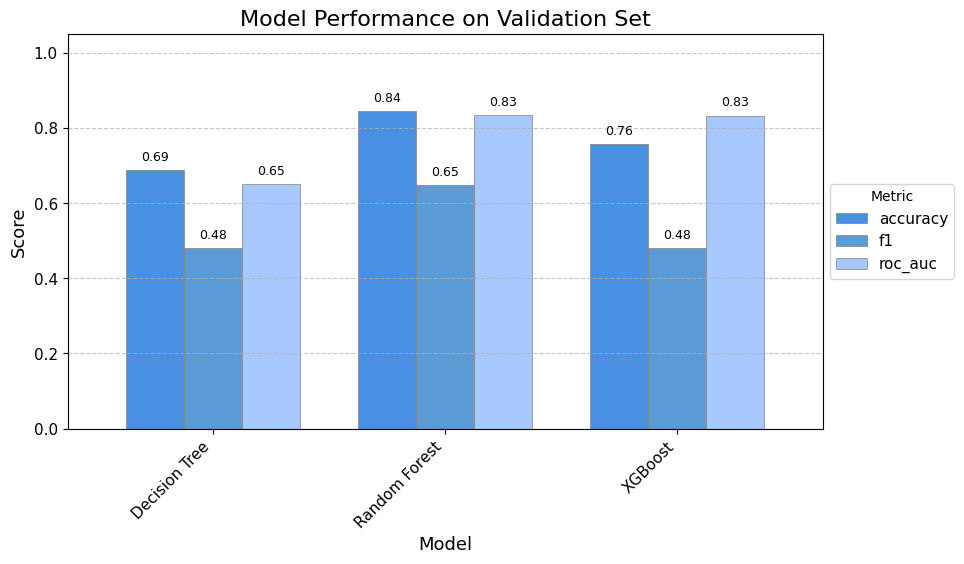

In [186]:
colors = ['#4a90e2', '#5b9bd5', '#a6c8ff']

fig, ax = plt.subplots(figsize=(10, 6))
results_df.plot(kind='bar', ax=ax, color=colors, width=0.75, edgecolor='grey', linewidth=0.5)

plt.title("Model Performance on Validation Set", fontsize=16)
plt.xlabel("Model", fontsize=13)
plt.ylabel("Score", fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.legend(title="Metric", fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(axis='y', linestyle='--', alpha=0.7)

ax.set_ylim(0, 1.05)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type="edge", padding=5, fontsize=9, clip_on=True)

plt.tight_layout(pad=2)

plt.show()

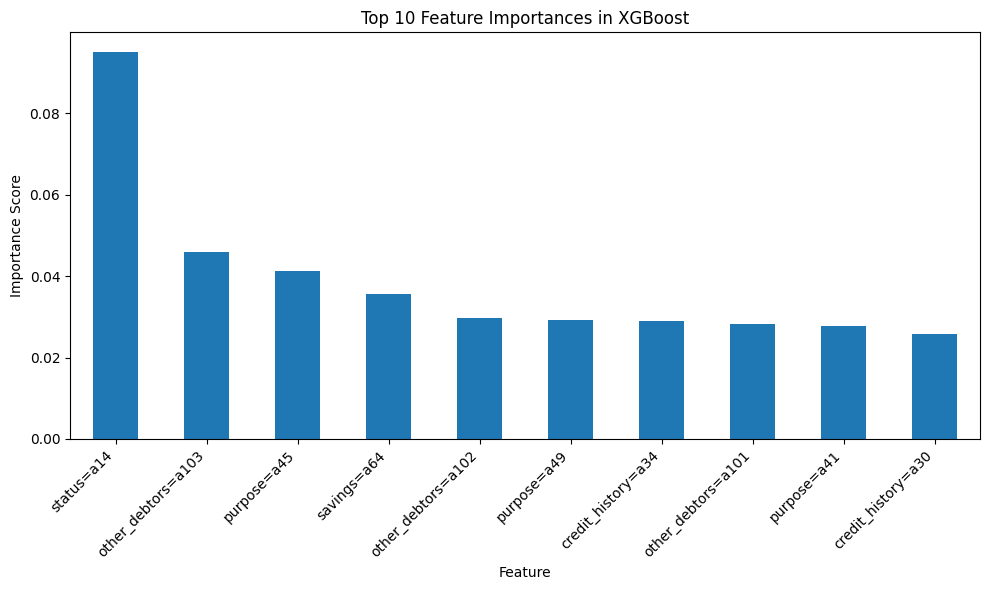

In [187]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_importances = pd.Series(xgb_model.feature_importances_, index=dv.feature_names_)
xgb_importances = xgb_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
xgb_importances.head(10).plot(kind='bar', ax=ax)
plt.title("Top 10 Feature Importances in XGBoost")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Parameter Tuning.

In [188]:
from sklearn.model_selection import train_test_split

X_train_tune, X_val, y_train_tune, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb = XGBClassifier(eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_tune, y_train_tune)

In [ ]:
best_xgb = random_search.best_estimator_

y_val_pred = best_xgb.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, best_xgb.predict_proba(X_val)[:, 1])

print("Validation Set Performance.")
print(f"Accuracy. {accuracy:.4f}.")
print(f"F1 Score. {f1:.4f}.")
print(f"ROC AUC. {roc_auc:.4f}.")

In [ ]:
final_xgb = XGBClassifier(**random_search.best_params_, eval_metric='logloss')
final_xgb.fit(X_train, y_train)

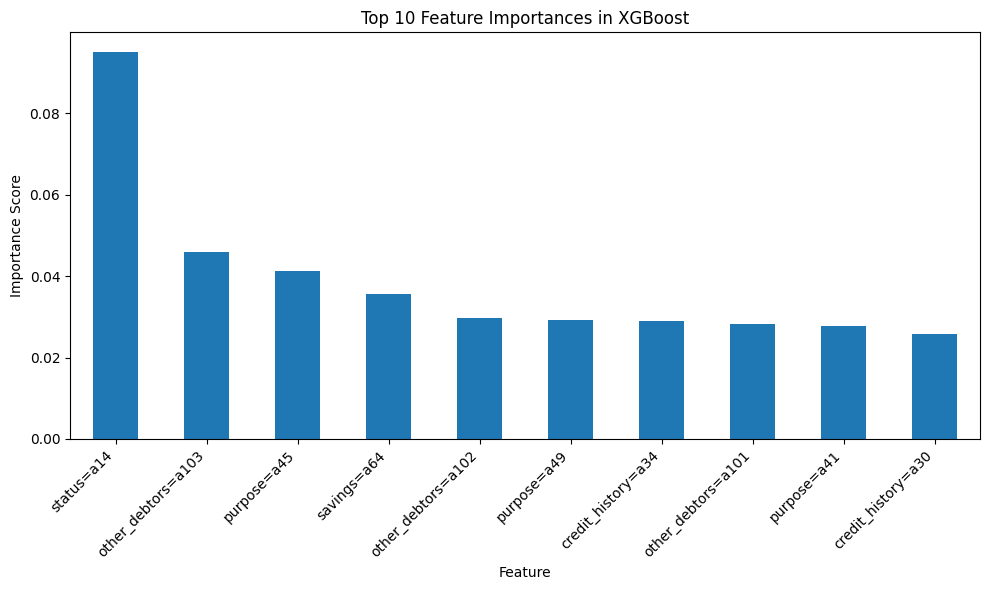

In [196]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_importances = pd.Series(xgb_model.feature_importances_, index=dv.feature_names_)
xgb_importances = xgb_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
xgb_importances.head(10).plot(kind='bar', ax=ax)
plt.title("Top 10 Feature Importances in XGBoost")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
y_test_pred = final_xgb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, final_xgb.predict_proba(X_test)[:, 1])

print("Test Set Performance.")
print(f"Accuracy. {test_accuracy:.4f}.")
print(f"F1 Score. {test_f1:.4f}.")
print(f"ROC AUC. {test_roc_auc:.4f}.")

In [198]:
import joblib

joblib.dump(xgb_model, 'model.pkl')

['model.pkl']

In [ ]:
print(f"Best Hyperparameters. {random_search.best_params_}.")
print(f"Final Test Accuracy. {test_accuracy:.4f}.")
print(f"Final Test F1 Score. {test_f1:.4f}.")
print(f"Final Test ROC AUC. {test_roc_auc:.4f}.")

## Load the model.

In [10]:
import pickle

In [199]:
dv_input_file = 'dv.pkl'
model_input_file = 'model.pkl'

In [200]:
with open(dv_input_file, 'rb') as f_in:
  dv = pickle.load(f_in)

In [201]:
with open(model_input_file, 'rb') as f_in:
  model = pickle.load(f_in)

In [202]:
dv, model

(DictVectorizer(sparse=False),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, random_state=None, ...))

In [206]:
client = df.iloc[0].to_dict()